In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine_sales_data.csv')

df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [4]:
# bucket wine quality scores / points into quality groups
df['quality_label'] = df['points'].apply(lambda value: '80-89'
if value < 90 else '90-100')

df['quality_label'] = pd.Categorical(df['quality_label'],
categories=['80-89', '90-100'])

In [5]:
world = df.drop(['description', 'winery', 'region_1', 'region_2', 'Unnamed: 0'], axis = 1)
world.columns

Index(['country', 'designation', 'points', 'price', 'province', 'variety',
       'quality_label'],
      dtype='object')

In [6]:
world = world.dropna(subset=['price', 'country'])
world.count()

country          137230
designation       94919
points           137230
price            137230
province         137230
variety          137230
quality_label    137230
dtype: int64

In [7]:
france = world[world['country'] == 'France']
germany = world[world['country'] == 'Germany']
italy = world[world['country'] == 'Italy']
portugal = world[world['country'] == 'Portugal']
spain = world[world['country'] == 'Spain']
south_africa = world[world['country'] == 'South Africa']
usa = world[world['country'] == 'US']
region_vv = world[world['province'] == 'Vinho Verde']
#portugal = pd.DataFrame(portugal)
germany.describe()

,points,price
count,2347.000000,2347.000000
mean,88.610567,39.011078
std,2.916430,56.857128
min,80.000000,5.000000
25%,87.000000,18.000000
50%,89.000000,24.000000
75%,90.000000,40.000000
max,97.000000,775.000000


In [8]:
comp_countries = [germany, italy, portugal, spain, south_africa, usa, region_vv]
selection = france.copy()

for i in comp_countries:
    selection = selection.append(i)

selection

,country,designation,points,price,province,variety,quality_label
4,France,La Brûlade,95,66.0,Provence,Provence red blend,90-100
13,France,Château Montus Prestige,95,90.0,Southwest France,Tannat,90-100
18,France,Le Pigeonnier,95,290.0,Southwest France,Malbec,90-100
33,France,Nonpareil Trésor Rosé Brut,90,22.0,France Other,Sparkling Blend,90-100
36,France,NaN,90,60.0,Rhône Valley,Rhône-style White Blend,90-100
...,...,...,...,...,...,...,...
141129,Portugal,NaN,83,9.0,Vinho Verde,Portuguese White,80-89
141143,Portugal,NaN,82,8.0,Vinho Verde,Portuguese White,80-89
141148,Portugal,Gatão,82,6.0,Vinho Verde,Portuguese White,80-89
143472,Portugal,NaN,86,9.0,Vinho Verde,White Blend,80-89


[(0.0, 200.0)]

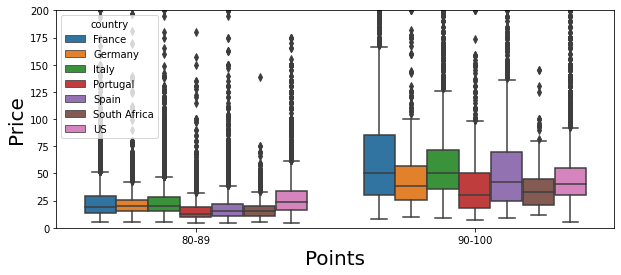

In [16]:
f, ax = plt.subplots(figsize=(10, 4))
#sns.boxplot(x="quality_label", y="price", palette=["c"], data=world, ax = ax)
sns.boxplot(x="quality_label", y="price", hue = 'country', data=selection, ax = ax)
#sns.boxplot(x="quality_label", y="price", palette=["r"], data=world[world['country'] == 'Portugal'], ax = ax)
ax.set_xlabel('Points', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
ax.set(ylim=(0, 200))
#ax.legend('')

Text(0, 0.5, 'Price')

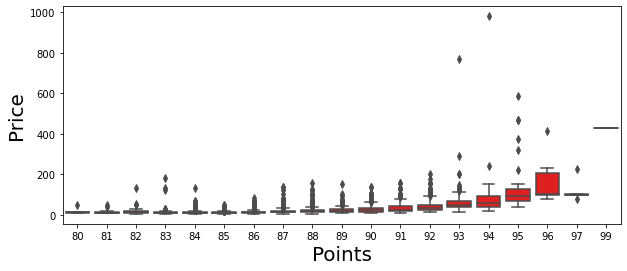

In [12]:
f, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x="points", y="price", palette=["r"], data=portugal, ax = ax)
ax.set_xlabel('Points', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
#ax.set(ylim=(0, 1000))
#ax.legend('')

Text(0, 0.5, 'Price')

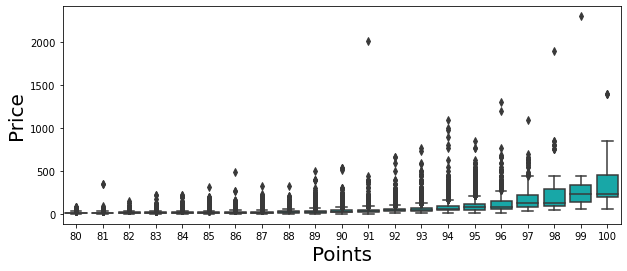

In [13]:
f, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x="points", y="price", palette=["c"], data=world, ax = ax)
ax.set_xlabel('Points', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
#ax.set(ylim=(0, 1000))
#ax.legend('')

Text(0, 0.5, 'Price')

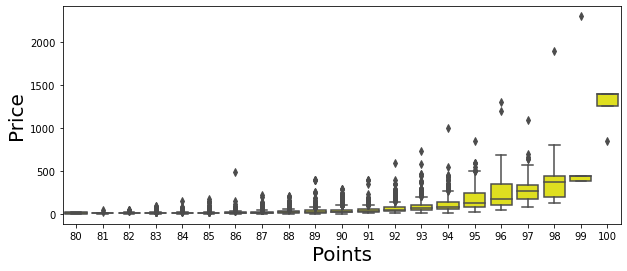

In [20]:
f, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x="points", y="price", palette=["yellow"], data=france, ax = ax)
ax.set_xlabel('Points', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
#ax.set(ylim=(0, 1000))
#ax.legend('')